#                     CAR PRICE PREDICTION

###  Setting up Enviroment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\prasad bolgss\Downloads\2261587-car_data_(1)\car data (1).csv')

###  Data Exploration

In [2]:
df.head() #veiwing the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.Car_Name.unique() # Cheacking for unique Car Names

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [4]:
df.isnull().sum() # cheacking for null values in dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()
df[df.duplicated()] # cheacking Duplicate values in dataswet

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


### Data Cleaning

In [6]:
df.drop_duplicates(inplace=True) #removing duplicates
df.duplicated().sum()

0

In [7]:
# Replacing the vehicle names with corrected vehicle names
original_names=['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
       'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ',
       'Honda Dream Yuga ', 'Bajaj Avenger Street 220',
       'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
       'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS',
       'Activa 4g', 'Honda CB Unicorn', 'Hero Honda CBZ extreme',
       'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
       'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego',
       'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
       'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc',
       'Hero  CBZ Xtreme', 'Bajaj  ct 100', 'i20', 'grand i10', 'i10',
       'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio',
       'amaze', 'jazz']
corrected_names=['Maruti Ritz', 'Maruti SX4', 'Maruti Ciaz', 'Maruti Wagon R', 'Maruti Swift', 'Maruti Vitara Brezza',
    'Maruti S-Cross', 'Maruti Alto 800', 'Maruti Ertiga', 'Maruti Dzire', 'Maruti Alto K10', 'Maruti Ignis',
    'Maruti 800', 'Maruti Baleno', 'Maruti Omni', 'Toyota Fortuner', 'Toyota Innova', 'Toyota Corolla Altis',
    'Toyota Etios Cross', 'Toyota Etios G', 'Toyota Etios Liva', 'Toyota Corolla', 'Toyota Etios GD',
    'Toyota Camry', 'Toyota Land Cruiser', 'Royal Enfield Thunder 500',
    'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
    'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
    'Royal Enfield Thunder 350', 'KTM 390 Duke',
    'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
    'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
    'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
    'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
    'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Xtreme',
    'Bajaj Avenger 220 DTSi', 'Bajaj Avenger 150 Street',
    'Yamaha FZ V 2.0', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar 220 F',
    'TVS Apache RTR 180', 'Hero Passion XPro', 'Bajaj Pulsar NS 200',
    'Yamaha Fazer', 'Honda Activa 4G', 'TVS Sport',
    'Honda Dream Yuga', 'Bajaj Avenger Street 220',
    'Hero Splendor iSmart', 'Honda Activa 3G', 'Hero Passion Pro',
    'Honda CB Trigger', 'Yamaha FZ-S', 'Bajaj Pulsar 135 LS',
    'Honda Activa 4G', 'Honda CB Unicorn', 'Hero Honda CBZ Extreme',
    'Honda Karizma', 'Honda Activa 125', 'TVS Jupiter',
    'Hero Honda Passion Pro', 'Hero Splendor Plus', 'Honda CB Shine',
    'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego',
    'Honda CB Twister', 'Hero Glamour', 'Hero Super Splendor',
    'Bajaj Discover 125', 'Hero Hunk', 'Hero Ignitor Disc',
    'Hero CBZ Xtreme', 'Bajaj CT 100', 'Hyundai i20', 'Hyundai Grand i10', 'Hyundai i10',
    'Hyundai Eon', 'Hyundai Xcent', 'Hyundai Elantra', 'Hyundai Creta', 'Hyundai Verna', 'Honda City', 'Honda Brio',
    'Honda Amaze', 'Honda Jazz']
df.Car_Name=df.Car_Name.replace(original_names,corrected_names)
df['Car_Name'].unique()

array(['Maruti Ritz', 'Maruti SX4', 'Maruti Ciaz', 'Maruti Wagon R',
       'Maruti Swift', 'Maruti Vitara Brezza', 'Maruti S-Cross',
       'Maruti Alto 800', 'Maruti Ertiga', 'Maruti Dzire',
       'Maruti Alto K10', 'Maruti Ignis', 'Maruti 800', 'Maruti Baleno',
       'Maruti Omni', 'Toyota Fortuner', 'Toyota Innova',
       'Toyota Corolla Altis', 'Toyota Etios Cross', 'Toyota Etios G',
       'Toyota Etios Liva', 'Toyota Corolla', 'Toyota Etios GD',
       'Toyota Camry', 'Toyota Land Cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke', 'Mahindra Mojo XT300',
       'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
       'Royal Enfield Classic 500', 'Bajaj Avenger 220',
       'Bajaj Avenger 150', 'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0',
       'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150',
       '

In [8]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

## Data Analysis

### Uivariate analysis

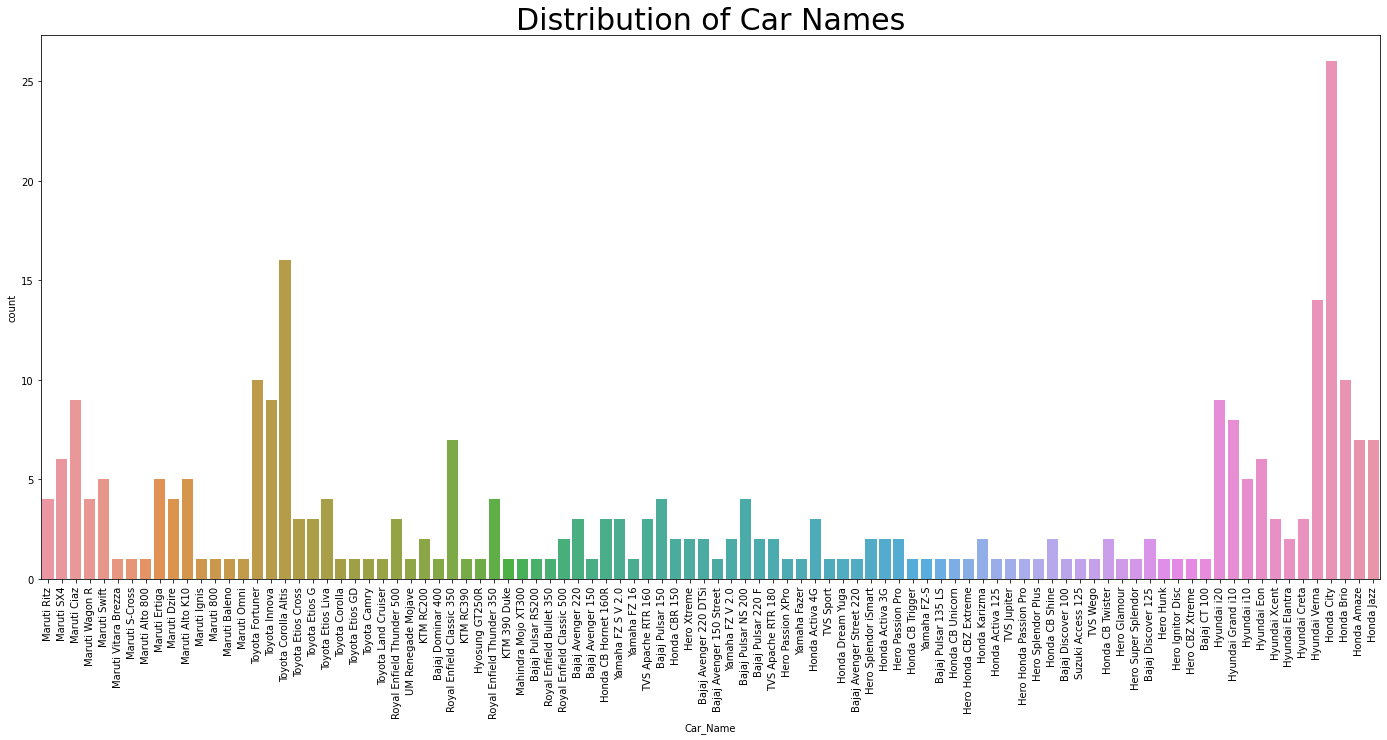

In [9]:
#univariate analyasis
plt.rcParams['figure.figsize']=(24,10)
sns.countplot(data=df,x=df.Car_Name)
#plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Distribution of Car Names",fontsize=30)
plt.show()

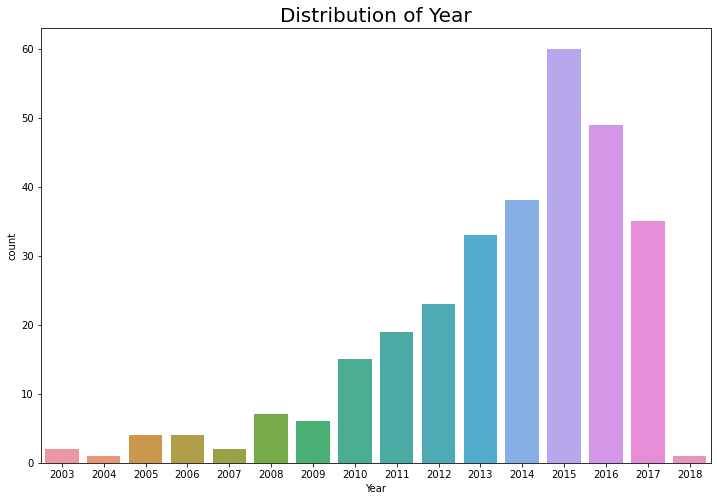

In [10]:
plt.rcParams['figure.figsize']=(12,8)
sns.countplot(data=df,x=df.Year)
plt.title("Distribution of Year",fontsize=20)

plt.show()

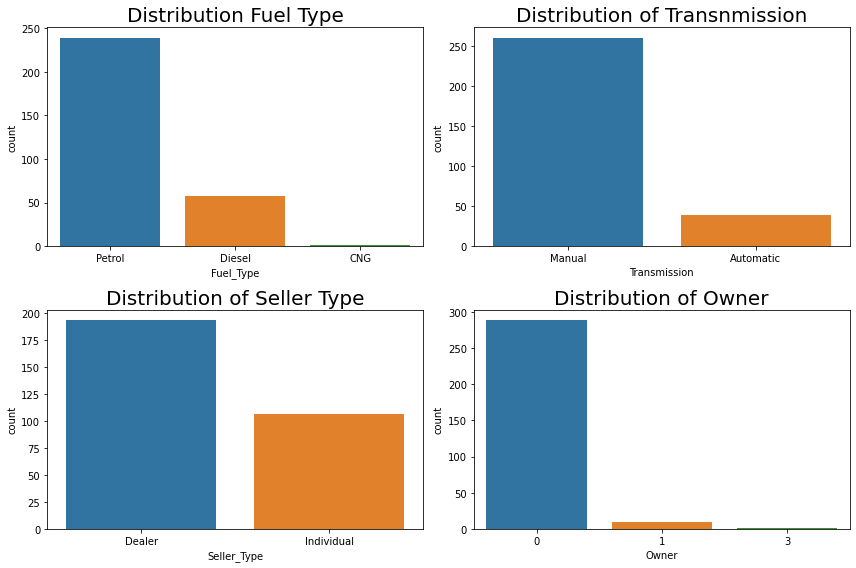

In [11]:
plt.subplot(2,2,1)
sns.countplot(data=df,x=df.Fuel_Type)
plt.title("Distribution Fuel Type",fontsize=20)

plt.subplot(2,2,2)
sns.countplot(data=df,x=df.Transmission)
plt.title("Distribution of Transnmission",fontsize=20)

plt.subplot(2,2,3)
sns.countplot(data=df,x=df.Seller_Type)
plt.title("Distribution of Seller Type",fontsize=20)

plt.subplot(2,2,4)
sns.countplot(data=df,x=df.Owner)
plt.title("Distribution of Owner",fontsize=20)
plt.tight_layout()

plt.show()

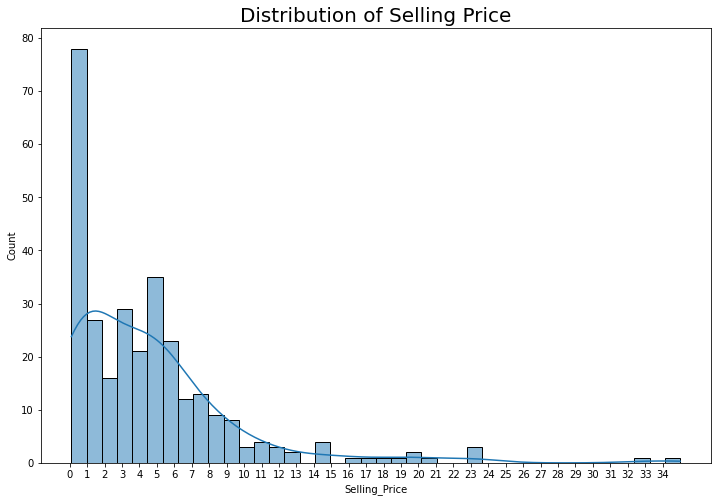

In [12]:
sns.histplot(data=df,x=df.Selling_Price,kde=True,bins=40)
plt.xticks(ticks=range(0, 35, 1))
plt.title("Distribution of Selling Price",fontsize=20)


plt.show()

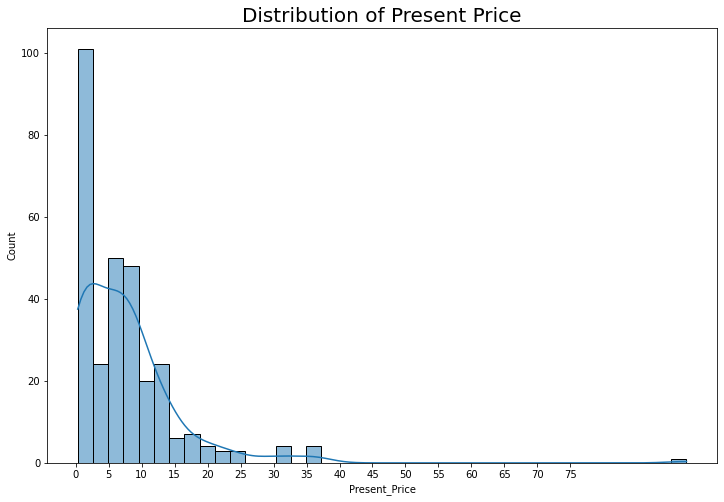

In [13]:
sns.histplot(data=df,x=df.Present_Price,kde=True,bins=40)
plt.xticks(ticks=range(0, 80, 5))
plt.title("Distribution of Present Price",fontsize=20)

plt.show()

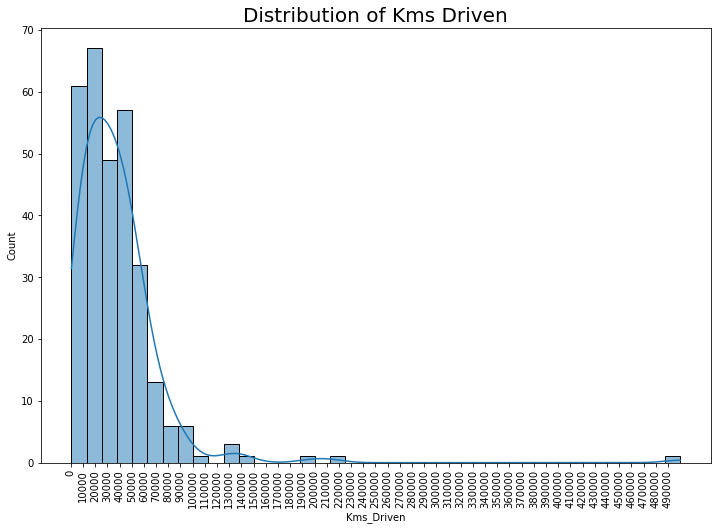

In [14]:
sns.histplot(data=df,x=df.Kms_Driven,kde=True,bins=40)
plt.xticks(ticks=range(0, 500000, 10000))
plt.xticks(rotation=90 )
plt.title("Distribution of Kms Driven",fontsize=20)



plt.show()

 ## Bivariate Analysis

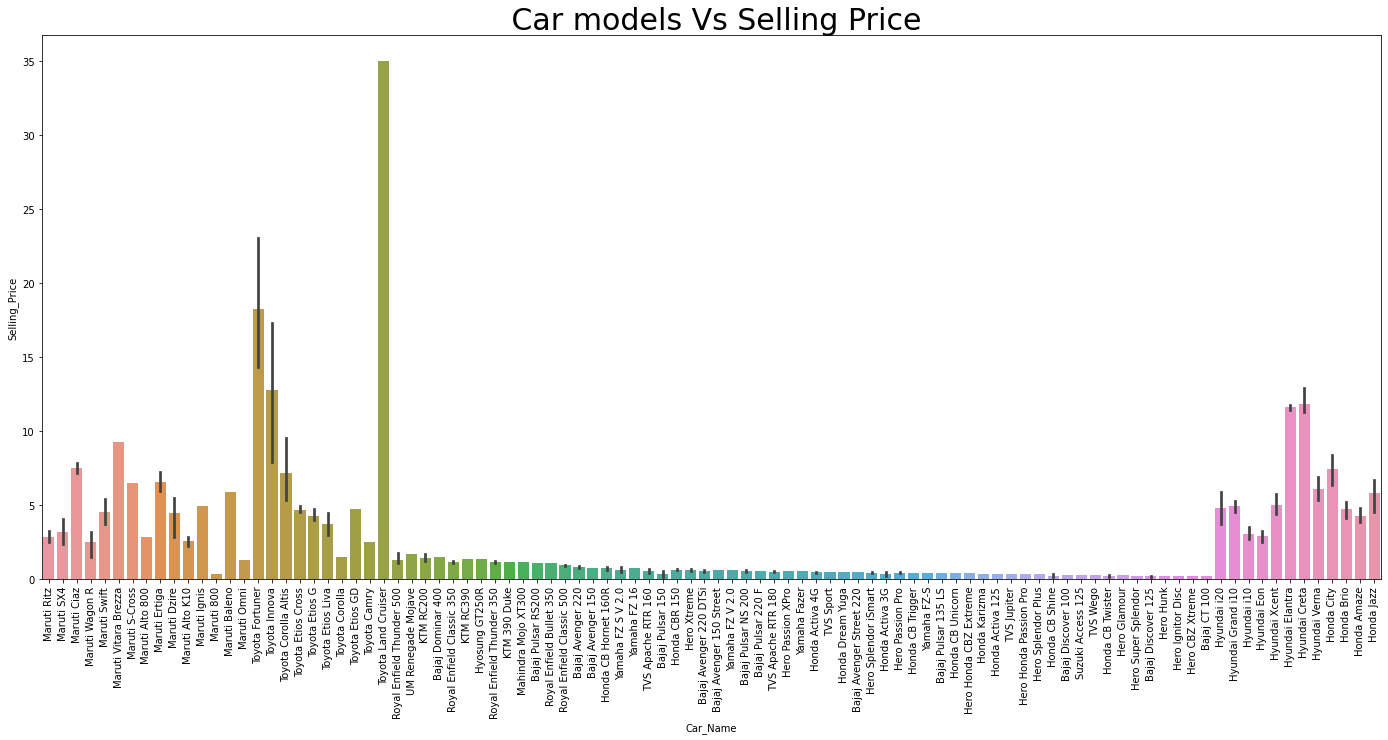

In [15]:
plt.rcParams['figure.figsize']=(24,10)
sns.barplot(y=df.Selling_Price,x=df.Car_Name)
#plt.tight_layout()
plt.xticks(rotation=90)
plt.title(" Car models Vs Selling Price",fontsize=30)
plt.show()

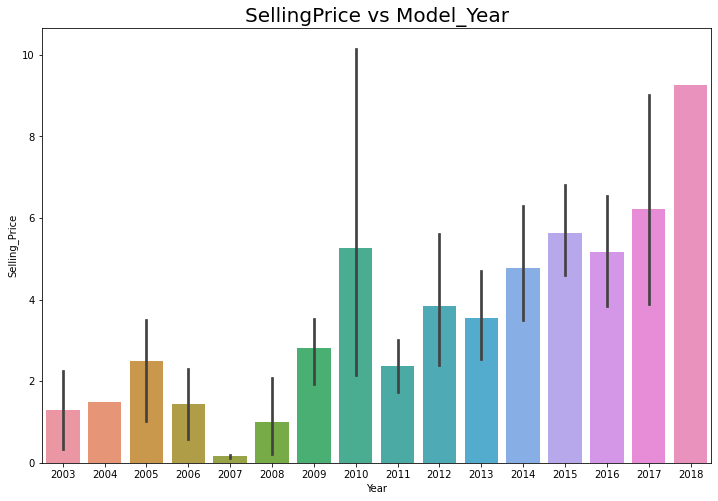

In [16]:
plt.rcParams['figure.figsize']=(12,8)
sns.barplot(y=df.Selling_Price,x=df.Year)
plt.title("SellingPrice vs Model_Year",fontsize=20)

plt.show()

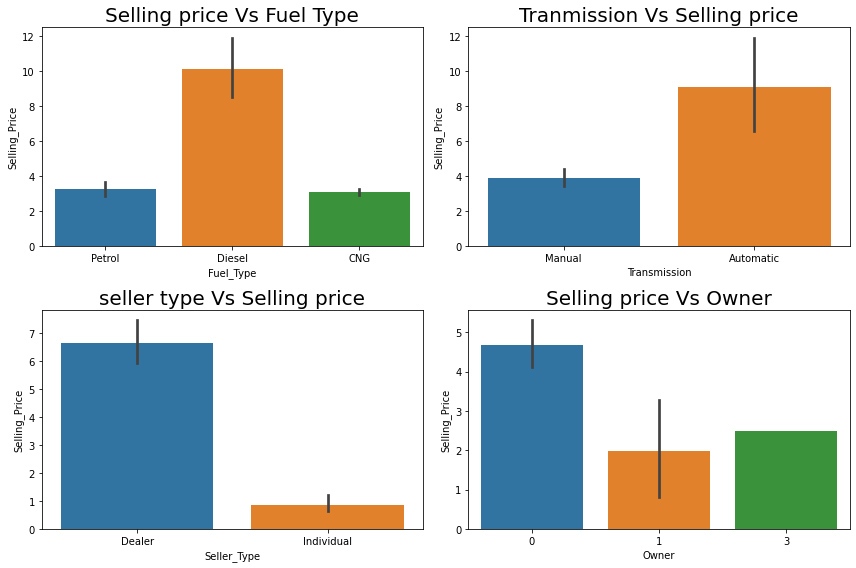

In [17]:
plt.subplot(2,2,1)
sns.barplot(y=df.Selling_Price,x=df.Fuel_Type)
plt.title("Selling price Vs Fuel Type",fontsize=20)

plt.subplot(2,2,2)
sns.barplot(y=df.Selling_Price,x=df.Transmission)
plt.title("Tranmission Vs Selling price",fontsize=20)

plt.subplot(2,2,3)
sns.barplot(y=df.Selling_Price,x=df.Seller_Type)
plt.title("seller type Vs Selling price",fontsize=20)

plt.subplot(2,2,4)
sns.barplot(y=df.Selling_Price,x=df.Owner)
plt.title("Selling price Vs Owner",fontsize=20)
plt.tight_layout()

plt.show()

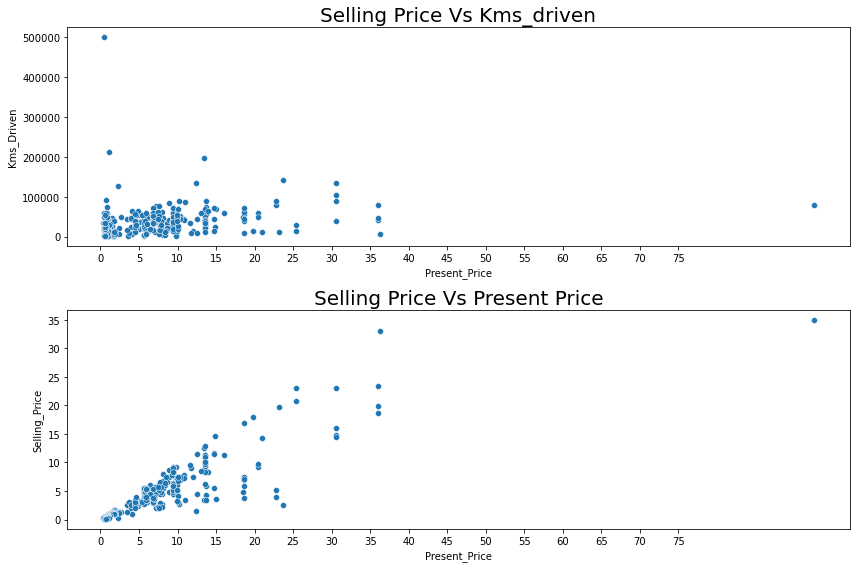

In [18]:
plt.subplot(2,1,1)
sns.scatterplot(y=df.Kms_Driven,x=df.Present_Price)
plt.xticks(ticks=range(0, 80, 5))
plt.title("Selling Price Vs Kms_driven",fontsize=20)
plt.subplot(2,1,2)
sns.scatterplot(y=df.Selling_Price,x=df.Present_Price)
plt.xticks(ticks=range(0, 80, 5))
plt.title("Selling Price Vs Present Price",fontsize=20)
plt.tight_layout()

plt.show()


## Machine Learning



**Project: Car Price Prediction**

*Introduction:*
In this machine learning project, we aim to predict car prices accurately. We'll follow a systematic approach, including data preprocessing, feature engineering, and outlier handling, to enhance model performance.

**Approach 1: Establishing Baseline**
- Begin by creating a **baseline machine learning model** with raw data.
- Evaluate the model's performance without any preprocessing.

**Approach 2: Feature Engineering**
- Remove irrelevant columns, e.g., 'Car_Name,' to simplify the dataset.
- Apply **one-hot encoding** to 'Fuel_Type' for numeric conversion; check if it improves the model.

**Approach 3: Data Transformation**
- Explore **logarithmic transformation** for right-skewed features like 'Kms_Driven' and 'Present_Price.'
- Assess if data transformation leads to a more normal distribution of these features and improved model performance.

**Approach 4: Handling Outliers**
- Identify and remove outliers from the dataset, especially in numeric features.
- Measure the impact of outlier removal on the model's evaluation metrics.


---

**Approach 1: Establishing Baseline**
- Begin by creating a **baseline machine learning model** with raw data.
- Evaluate the model's performance without any preprocessing.


#### Data preprocessing for base model

In [35]:
df_0=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_0.columns:
    if df_0[i].dtypes=='object':
        df_0[i]=le.fit_transform(df_0[i])

df_0['Year']=le.fit_transform(df_0['Year'])
y=df_0['Selling_Price']
x=df_0.drop('Selling_Price', axis=1)





from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
y_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


### Evaluation of Baseline Models

In [36]:
# cheacking best models for training our data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.2),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Support vector Regressor":SVR()
}
models_comaprison=[]
for name, model in models.items():
    model.fit(x_train,y_train)
    prediction= model.predict(x_test)
    r2= r2_score(y_test,prediction)
    mse= mean_squared_error(y_test,prediction)
    mae= mean_absolute_error(y_test,prediction)
    models_comaprison.append((name,r2,mse,mae))
    
evaluation=pd.DataFrame(models_comaprison,columns=['Name','R2_Score','MSE','MAE'])
evaluation.sort_values(by='R2_Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Wistia')

,Name,R2_Score,MSE,MAE
0,GradientBoostingRegressor,0.929841,2.236669,0.673514
1,DecisionTreeRegressor,0.919931,2.552572,0.789500
2,RandomForestRegressor,0.911142,2.832770,0.726533
3,AdaBoostRegressor,0.879264,3.849045,1.037827
4,KNeighborsRegressor,0.876119,3.949288,1.063167
5,LinearRegression,0.848285,4.836654,1.280941
6,Lasso,0.829752,5.427483,1.258193
7,Support vector Regressor,0.564429,13.885906,1.272350


#### we have GradientBoostingRegressor with Highest accuracy 93%

**Approach 2 Feature Engineering**
- Remove irrelevant columns, e.g., 'Car_Name,' to simplify the dataset.
- Apply **one-hot encoding** to 'Fuel_Type' for numeric conversion; check if it improves the model.


In [37]:
df2=df.drop('Car_Name',axis=1)
one_hot=pd.get_dummies(df2['Fuel_Type'])
df2.drop('Fuel_Type',axis=1,inplace=True)
df2=pd.concat([df2,one_hot],axis=1)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=le.fit_transform(df2[i])

df2['Year']=le.fit_transform(df2['Year'])
y=df2['Selling_Price']
x=df2.drop('Selling_Price', axis=1)

from sklearn.model_selection import train_test_split
x_train_0,x_test_0,y_train_0,y_test_0=train_test_split(x,y,test_size=0.2,random_state=20)
y_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train_0)
x_test=sc.transform(x_test_0)


### Evaluation of Approach 2

In [38]:
# cheacking best models for training our data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.2),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Support vector Regressor":SVR()
}
models_comaprison=[]
for name, model in models.items():
    model.fit(x_train_0,y_train_0)
    prediction= model.predict(x_test_0)
    r2= r2_score(y_test,prediction)
    mse= mean_squared_error(y_test_0,prediction)
    mae= mean_absolute_error(y_test_0,prediction)
    models_comaprison.append((name,r2,mse,mae))
    
evaluation=pd.DataFrame(models_comaprison,columns=['Name','R2_Score','MSE','MAE'])
evaluation.sort_values(by='R2_Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Wistia')

,Name,R2_Score,MSE,MAE
0,GradientBoostingRegressor,0.927809,2.301431,0.685318
1,DecisionTreeRegressor,0.907508,2.948637,0.858000
2,RandomForestRegressor,0.906897,2.968114,0.733637
3,AdaBoostRegressor,0.886104,3.630985,1.003237
4,LinearRegression,0.854990,4.622881,1.250811
5,Lasso,0.839584,5.114031,1.276757
6,Support vector Regressor,-0.082940,34.523878,3.232094
7,KNeighborsRegressor,-0.103309,35.173240,3.602733


**No Significant Change in Model Performance**

**Step 3: Data Transformation**
- Explore **logarithmic transformation** for right-skewed features like 'Kms_Driven' and 'Present_Price.'
- Assess if data transformation leads to a more normal distribution of these features and improved model performance.


In [39]:
skewed_features=['Present_Price','Kms_Driven']
df_log=df.copy()
for i in skewed_features:
    df_log[i]=np.log10(df_log[i])
    

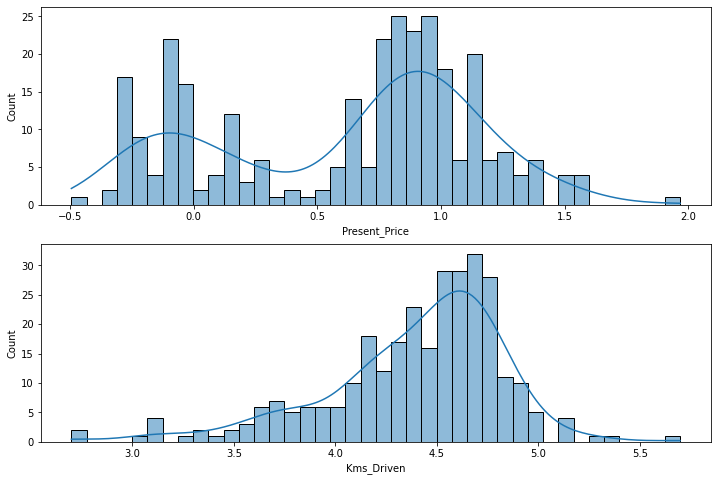

In [40]:
plt.subplot(2,1,1)
sns.histplot(data=df_log,x=df_log.Present_Price,kde=True,bins=40)
#plt.xticksticks=range(0, 80, 5))
plt.subplot(2,1,2)
sns.histplot(data=df_log,x=df_log.Kms_Driven,kde=True,bins=40)


plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_log.columns:
    if df_log[i].dtypes=='object':
        df_log[i]=le.fit_transform(df_log[i])

df_log['Year']=le.fit_transform(df_log['Year'])
y=df_log['Selling_Price']
x=df_log.drop('Selling_Price', axis=1)





from sklearn.model_selection import train_test_split
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x,y,test_size=0.2,random_state=20)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train_log)
x_test=sc.transform(x_test_log)

### Evaluation of Aproach 3 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.2),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Support vector Regressor":SVR()
}
models_comaprison=[]
for name, model in models.items():
    model.fit(x_train_log,y_train_log)
    prediction= model.predict(x_test_log)
    r2= r2_score(y_test_log,prediction)
    mse= mean_squared_error(y_test_log,prediction)
    mae= mean_absolute_error(y_test_log,prediction)
    models_comaprison.append((name,r2,mse,mae))
    
evaluation=pd.DataFrame(models_comaprison,columns=['Name','R2_Score','MSE','MAE'])
evaluation.sort_values(by='R2_Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Wistia')

,Name,R2_Score,MSE,MAE
0,GradientBoostingRegressor,0.928726,2.272203,0.675781
1,DecisionTreeRegressor,0.911730,2.814017,0.819667
2,RandomForestRegressor,0.901465,3.141268,0.742900
3,AdaBoostRegressor,0.901288,3.146927,0.976311
4,LinearRegression,0.697507,9.643395,2.020688
5,KNeighborsRegressor,0.650479,11.142659,1.739467
6,Lasso,0.623025,12.017866,1.961672
7,Support vector Regressor,0.027161,31.013902,3.182883


**No Signifacant change model performace for aproach 3**

**Step 4: Handling Outliers**
- Identify and remove outliers from the dataset, especially in numeric features.
- Measure the impact of outlier removal on the model's evaluation metrics.


<AxesSubplot:xlabel='Kms_Driven'>

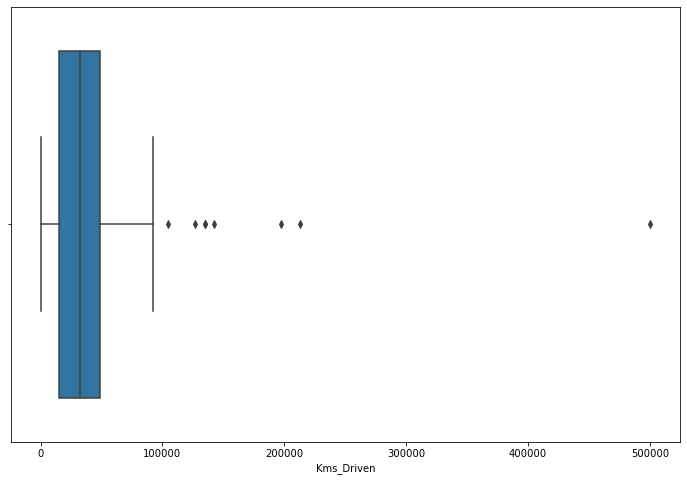

In [43]:

sns.boxplot(data=df,x='Kms_Driven')
#df=df[df[]]

In [44]:
df_1=df[df['Kms_Driven']<100000]


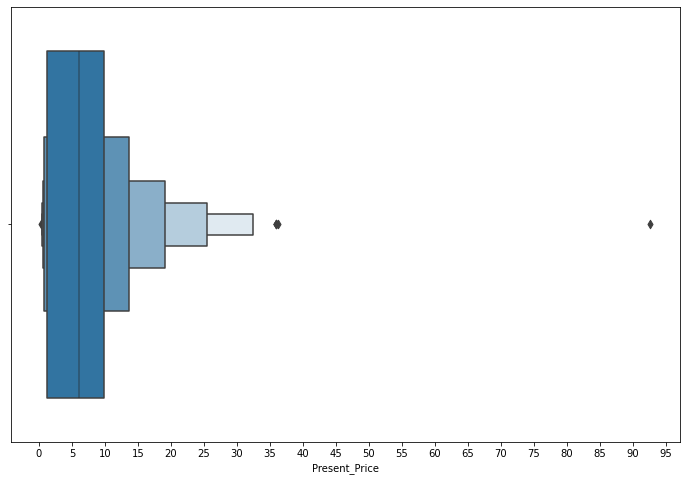

In [45]:
sns.boxenplot(data=df,x='Present_Price')
plt.xticks(ticks=range(0, 100, 5))
plt.show()


In [46]:
df_1=df[df['Present_Price']<35]


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_1.columns:
    if df_1[i].dtypes=='object':
        df_1[i]=le.fit_transform(df_1[i])

df_1['Year']=le.fit_transform(df_1['Year'])
y=df_1['Selling_Price']
x=df_1.drop('Selling_Price', axis=1)





from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.2,random_state=20)
y_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train_1)
x_test=sc.transform(x_test_1)
import warnings
warnings.filterwarnings('ignore')


### Evaluation of Approach 4

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.2),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Support vector Regressor":SVR()
}
models_comaprison=[]
for name, model in models.items():
    model.fit(x_train_1,y_train_1)
    prediction= model.predict(x_test_1)
    r2= r2_score(y_test_1,prediction)
    mse= mean_squared_error(y_test_1,prediction)
    mae= mean_absolute_error(y_test_1,prediction)
    models_comaprison.append((name,r2,mse,mae))
    
evaluation=pd.DataFrame(models_comaprison,columns=['Name','R2_Score','MSE','MAE'])
evaluation.sort_values(by='R2_Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Wistia')

,Name,R2_Score,MSE,MAE
0,RandomForestRegressor,0.956003,0.655392,0.465505
1,DecisionTreeRegressor,0.952044,0.714366,0.516610
2,GradientBoostingRegressor,0.922705,1.151395,0.548331
3,AdaBoostRegressor,0.898427,1.513056,0.925494
4,Lasso,0.841217,2.365266,1.076472
5,LinearRegression,0.807999,2.860083,1.141098
6,KNeighborsRegressor,-0.190484,17.733650,3.081288
7,Support vector Regressor,-0.219212,18.161583,2.852277


In [49]:
(1-(df_1.shape[0]/df.shape[0]))*100 # percentage information loss with outlier removal

1.6722408026755842

**Great! Here we are Getting 96% R2 score with Random Forest regressor with only loss of 1.67% of Information**

### Cross validating our model performace before taking final decision for getting more confidance on our model performace

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model=RandomForestRegressor()
print(f"Model: {model}")
r2_scores = []
mae_scores = []
    
for train_idx, val_idx in kf.split(x_train_1):
    x_train_fold, x_val_fold = x_train_1.iloc[train_idx], x_train_1.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_1.iloc[train_idx], y_train_1.iloc[val_idx]
        
    model.fit(x_train_fold, y_train_fold)
        
    y_pred_fold = model.predict(x_val_fold)
        
    r2_fold = r2_score(y_val_fold, y_pred_fold)
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
        
    r2_scores.append(r2_fold)
    mae_scores.append(mae_fold)
        
    print(f"Iteration - R2: {r2_fold:.4f}, MAE: {mae_fold:.4f}")
    
print("R2 Scores:", r2_scores)
print("Mean R2:", np.mean(r2_scores))
    
print("MAE Scores:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
    
print("==========================")


Model: RandomForestRegressor()
Iteration - R2: 0.9533, MAE: 0.4424
Iteration - R2: 0.9813, MAE: 0.3119
Iteration - R2: 0.9615, MAE: 0.4916
Iteration - R2: 0.9291, MAE: 0.6621
Iteration - R2: 0.9361, MAE: 0.5550
R2 Scores: [0.9533058068240173, 0.981283236002643, 0.9614769481389951, 0.929105166580752, 0.9360761250541273]
Mean R2: 0.952249456520107
MAE Scores: [0.4423702127659567, 0.31191489361702085, 0.49162765957446825, 0.6621127659574468, 0.5549574468085108]
Mean MAE: 0.4925965957446807


### our model is performing up to the mark for different splits and no any unsual deviation for any split